# Mesh
* read mesh file
* plot mesh 
* convert to shapely
* check if point is inside or outside mesh
* subset mesh, plot subset
* change z values
* change boundary codes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (6,6)

from mikeio import Mesh

In [2]:
meshfilename = r"../tests/testdata/odense_rough.mesh"
msh = Mesh(meshfilename)
msh

Mesh
Number of elements: 654
Number of nodes: 399
Projection: UTM-33

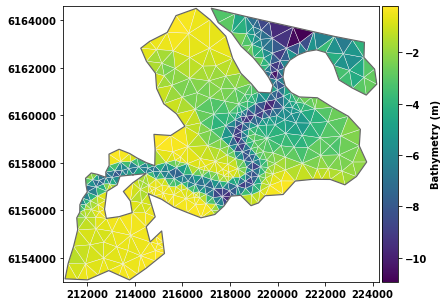

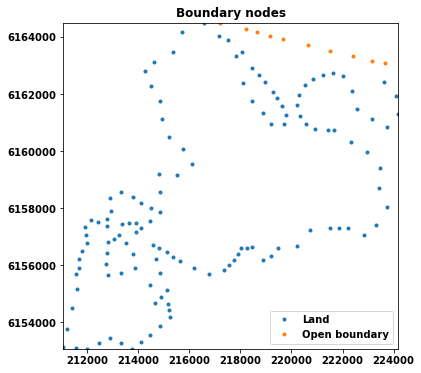

In [3]:
msh.plot()
msh.plot_boundary_nodes(boundary_names=['Land','Open boundary'])

# Convert mesh to shapely
Convert mesh to [shapely](https://shapely.readthedocs.io/en/latest/manual.html) MultiPolygon object, requires that the `shapely` library is installed.

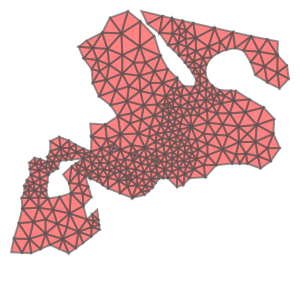

In [4]:
mp = msh.to_shapely()
mp

Now a lot of methods are available

In [5]:
mp.area

68931409.58160606

In [6]:
mp.bounds

(211068.501175313, 6153077.66681803, 224171.617336507, 6164499.42751662)

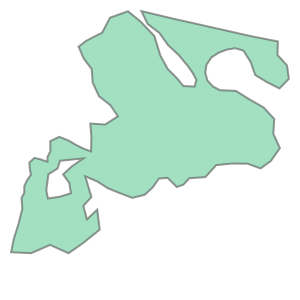

In [7]:
domain = mp.buffer(0)
domain

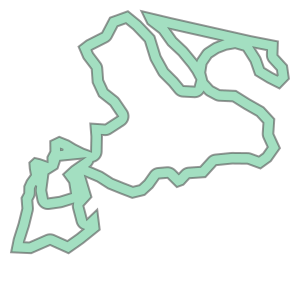

In [8]:
open_water = domain.buffer(-500)

coastalzone = domain - open_water
coastalzone

Find if points are inside the domain

In [9]:
from shapely.geometry import Point

p1 = Point(216000, 6162000)
p2 = Point(220000, 6156000)
print(mp.contains(p1))
print(mp.contains(p2))

True
False


## Mesh class can also check if a mesh contains points 

In [10]:
p1p2 = [[216000, 6162000], [220000, 6156000]]
msh.contains(p1p2)

array([ True, False])

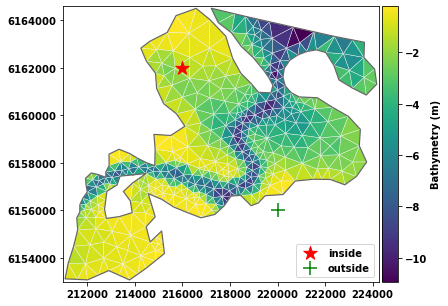

In [11]:
import matplotlib.pyplot as plt
ax = msh.plot()
ax.scatter(p1.x, p1.y, marker="*", s=200, c="red", label="inside")
ax.scatter(p2.x, p2.y, marker="+", s=200, c="green", label="outside")
ax.legend();

# Subset mesh
Select only elements with more than 3m depth. Plot these elements. 

In [12]:
zc = msh.element_coordinates[:,2]

In [13]:
elem_ids = msh.element_ids[zc<-3]

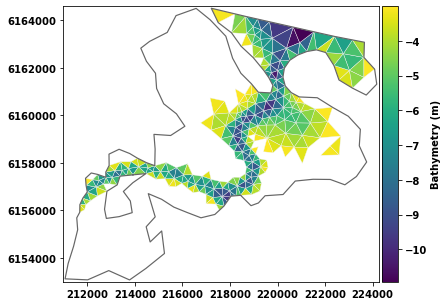

In [14]:
msh.plot(elements=elem_ids);

# Change z values and boundary code
Assume that we want to have a minimum depth of 2 meters and change the open boundary (code 2) to a closed one (code 1). 

In [15]:
print(f'max z before: {msh.node_coordinates[:,2].max()}')
zc = msh.node_coordinates[:,2]
zc[zc>-2] = -2
msh.set_z(zc)
print(f'max z after: {msh.node_coordinates[:,2].max()}')

max z before: -0.200000002980232
max z after: -2.0


In [16]:
print(f'valid codes before: {msh.valid_codes}')
c = msh.codes
c[c==2] = 1
msh.set_codes(c)
print(f'valid codes after: {msh.valid_codes}')

valid codes before: [0, 1, 2]
valid codes after: [0, 1]


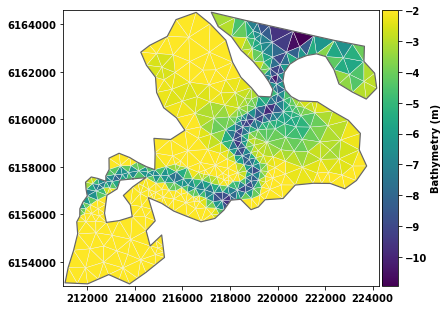

In [17]:
msh.plot();